# Ex12-1: XToon

Pr12_1_LightPath.blendを使って必要な中間画像を出力して実験してみましょう．
- diffuse, specular, silhouette等

## Ex12の実装部分

- xtoon_lookup関数を実装してください

ヒント: 以下の要領で実装すればOKです．

```
# 画像の幅と高さの取得
h, w = T.shape[:2]

# Work: x座標の計算(以下を修正)
x = int(I1とwの式)

# Work: y座標の計算(以下を修正)
y = int(I2とhの式)

# (x, y)座標の色の参照
return T[y, x, :]
```

- I1: [0, 1]⇒x: [0, w-1]
- I2: [0, 1]⇒y: [h-1, 0]

になるように変換式を作ってみましょう．
（yは順番が逆転するので注意）




In [2]:
# Work: 以下の関数を修正．
def xtoon_lookup(T, I1, I2):
  # 画像の幅と高さの取得
  h, w = T.shape[:2]

  # Work: x座標の計算(以下を修正)
  x = (int)(I1 * (w-1))

  # Work: y座標の計算(以下を修正)
  y = (int)((1 - I2)* (h-1))

  return T[y, x, :]

## 補助関数

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 画像読み込み
def imread(img_file):
  I = cv2.imread(img_file, -1)
  I = cv2.cvtColor(I, cv2.COLOR_BGRA2RGBA)
  return np.float32(I) / 255.0

# テクスチャ読み込み
def texread(img_file):
  I = cv2.imread(img_file)
  I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
  I = cv2.resize(I, dsize=(128, 128))
  return np.float32(I) / 255.0


# 入力画像のプロット
def plot_inputs(T, I1, I2):
  fig = plt.figure(figsize=(12,6))
  plt.subplot(1, 3, 1)
  plt.imshow(T)
  plt.axis("off")
  plt.title("2D Texture")

  ax = plt.subplot(1, 3, 2)
  ax.patch.set_facecolor([0.2, 0.25, 0.25]) 
  plt.imshow(I1)
  plt.xticks([])
  plt.yticks([])
  plt.title("Attribute 1")

  ax = plt.subplot(1, 3, 3)
  ax.patch.set_facecolor([0.2, 0.25, 0.25]) 
  plt.imshow(I2)
  plt.xticks([])
  plt.yticks([])
  plt.title("Attribute 2")

## XToonの入力画像

レンダリング画像を使ってXToonを実験しましょう．
- I1_file, I2_fileは横軸，縦軸のどちらにあたるでしょうか？

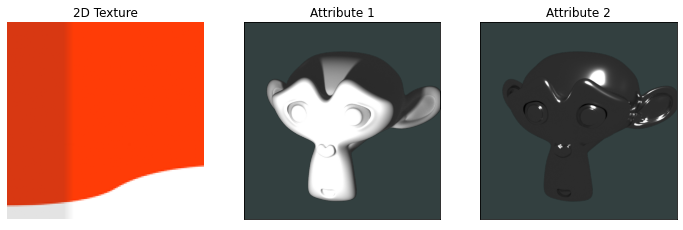

In [8]:
#@title Shadingパラメータ { run: "auto" }

#@markdown XToonテクスチャ画像
tex_file = "XToon2.png"  #@param {type:"string"}
T = texread(tex_file)

#@markdown アトリビュート1
I1_file = "diffuse0061.png"  #@param {type:"string"}
I1_img = imread(I1_file)

#@markdown アトリビュート2
I2_file = "specular0091.png"  #@param {type:"string"}
I2_img = imread(I2_file)

plot_inputs(T, I1_img, I2_img)

## 結果画像の確認

Text(0.5, 1.0, 'XToon')

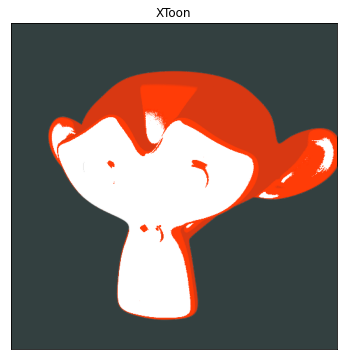

In [9]:
h, w = I1_img.shape[:2]
A = I1_img[:,:,3]

I = np.array([xtoon_lookup(T, I1, I2) for I1, I2 in zip(I1_img[:,:,0].flatten(), I2_img[:,:,0].flatten())])

I = I.reshape(h, w, -1)

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1, 1, 1)
ax.patch.set_facecolor([0.2, 0.25, 0.25]) 
plt.imshow(np.dstack([I, A]))
plt.xticks([])
plt.yticks([])
#
plt.title("XToon")